# Project: Investigate TMDB Data Analysis
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. and in particular, 


--------

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

--------

<a id='intro'></a>
## Introduction

> In this project we'll go through the Dataset in order to answer the below questions:
* What's the average movies runtime throughout the decades?
* What're the most used keywords in movies?
* Who's the most successful director ever?
* What're the most profitable movies in our Dataset?
* How many movies were produced every year?

--------

<a id='wrangling'></a>
# Data Wrangling:
> Let's take a deep look at our Dataset to ask the right questions. But first, let's import the tools we're gonna need to get the job done

In [24]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
sns.set(color_codes = True)

### General Properties

In [4]:
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


--------

## Data Cleaning
> To make sure you'll get correct results, you gotta clean and arrange your data properly first

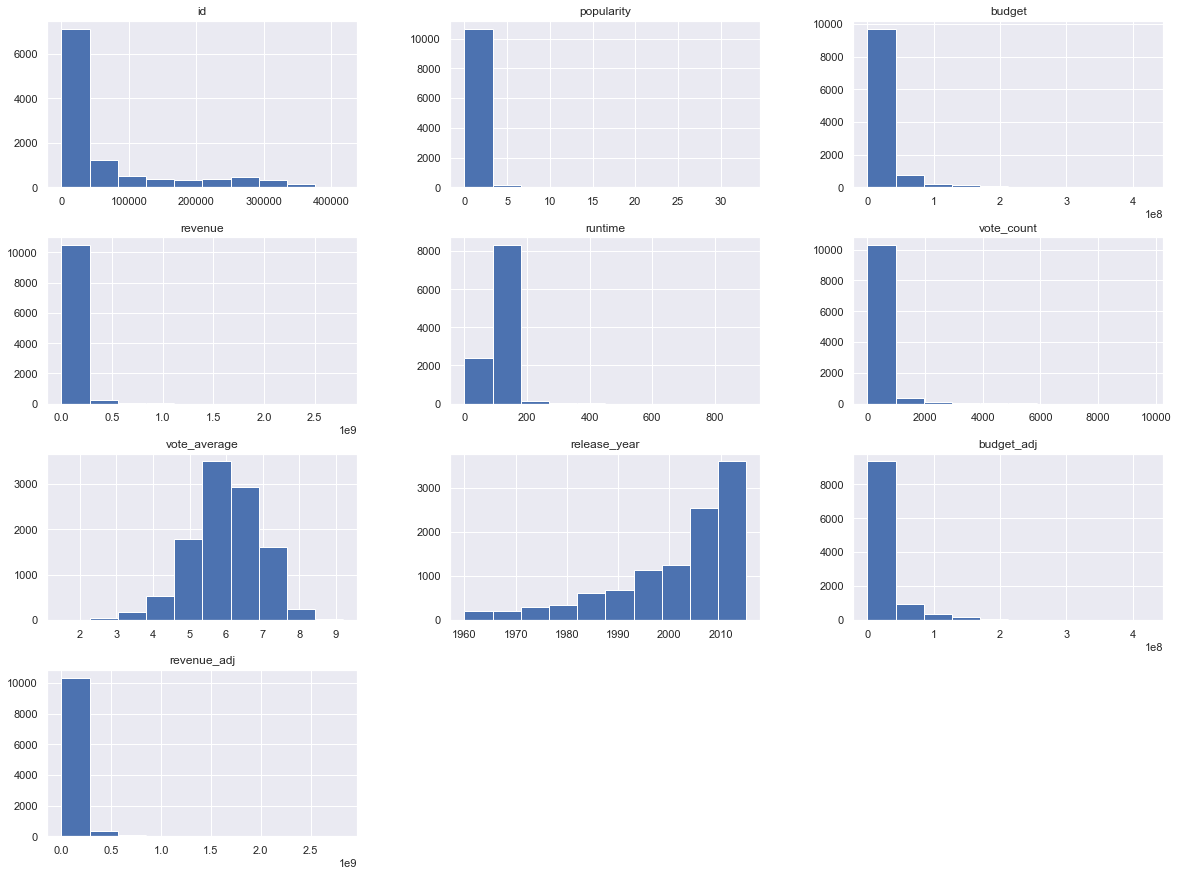

In [5]:
df.hist(figsize=(20, 15));

--------

In [6]:
df.shape

(10866, 21)

In [8]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

--------

In [66]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> As we can see, around 50% of the revenue and budget values are 0. And in order to solve this issue we either replace it with the mean or drop all the missing rows. However, since it's almost half of the data, the outcome won't be reliable. So, we'll consider the 0 values in revenue as if those movies didn't gain any revenue at all and the given values are actually, correct.

--------

In [65]:
df.fillna(df.mean(), inplace=True)

In [10]:
df.fillna('Unavailable')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Unavailable,Bruce Brown,Unavailable,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,Unavailable,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Unavailable,Eldar Ryazanov,Unavailable,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Unavailable,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


--------

<a id='eda'></a>
# Exploratory Data Analysis

> Now we have cleaned our dataset, and It's time to analyze it and answer our questions one by one.


### Q: What's the average movies runtime throughout the decades?

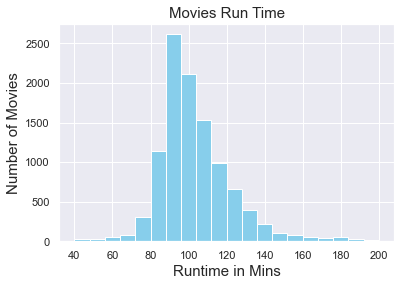

In [17]:
plt.hist(df['runtime'], range=(40,200), bins=20, color = "skyblue")
plt.title('Movies Run Time', fontsize = 15)
plt.xlabel('Runtime in Mins', fontsize = 15)
plt.ylabel('Number of Movies', fontsize = 15)
plt.show()

> Ok, so most overall movies' runtime is 90 minutes, but has it always been the most popular?

--------

In [11]:
grouped_movies = df['runtime'].groupby(df['release_year']).describe()

In [12]:
avg_runtime_by_year = grouped_movies ['mean']
avg_runtime_min = grouped_movies ['mean'] - grouped_movies ['std']
avg_runtime_max = grouped_movies ['mean'] + grouped_movies ['std']

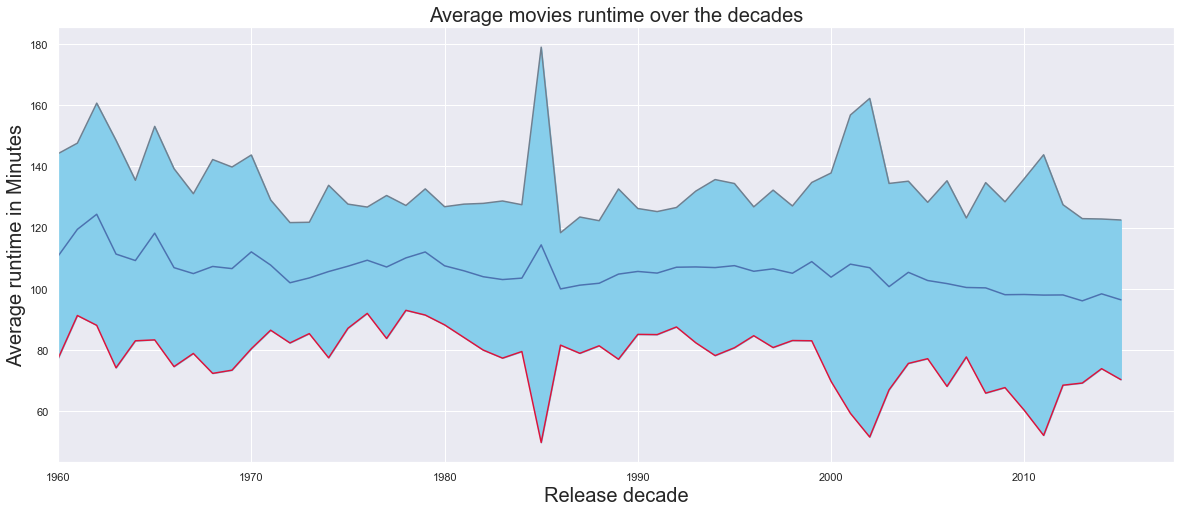

In [13]:
fig, x = plt.subplots(figsize=(20,8))
x.plot(avg_runtime_by_year)
x.plot(avg_runtime_min, color = 'crimson')
x.plot(avg_runtime_max, color = 'slategray')
x.fill_between(grouped_movies.index, avg_runtime_min, avg_runtime_max, color = 'skyblue')
x.set_title('Average movies runtime over the decades', fontsize = 20)
x.set_xlabel('Release decade', fontsize = 20)
x.set_ylabel('Average runtime in Minutes', fontsize = 20)
x.set_xlim(1960)
plt.show()

> That's about right, 90 to 120 minutes seems like the average throughout the decades

--------

### Q: Who's the most successful director ever?

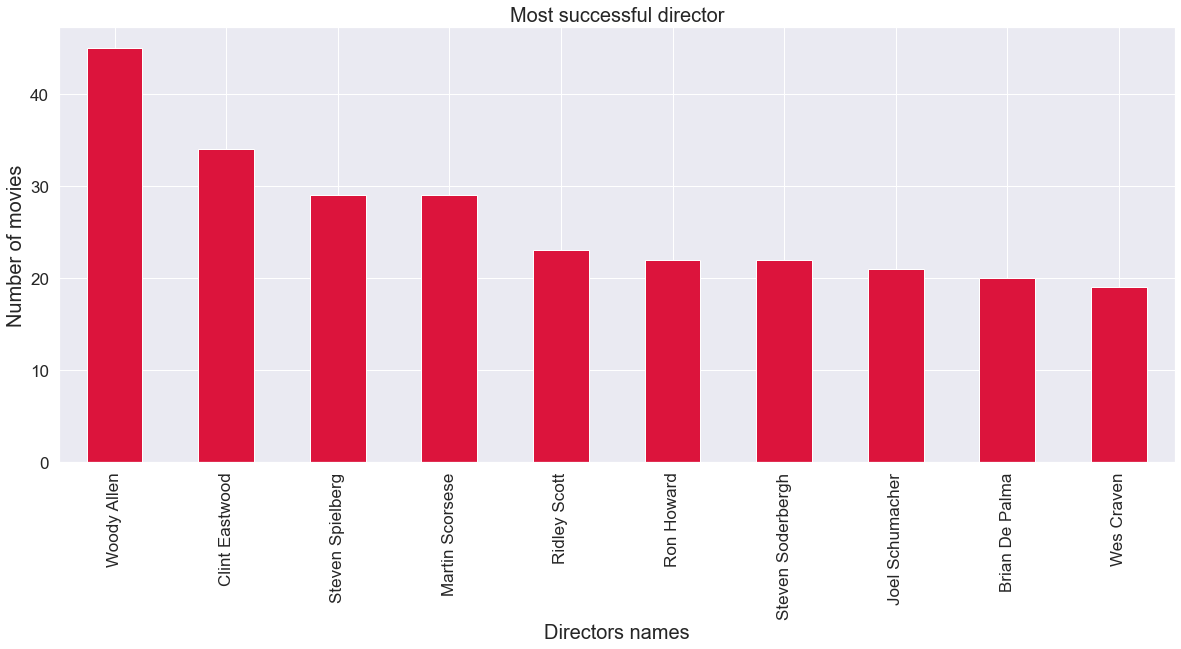

In [20]:
df['director'].value_counts().head(10).plot.bar(figsize=(20,8), fontsize=17, color='crimson');
plt.title('Most successful director', fontsize = 20)
plt.xlabel('Directors names', fontsize = 20)
plt.ylabel('Number of movies', fontsize = 20)
plt.show()

> from the given data, the director with most movies in the list is 'Woody Allen'. but that's debateable.

--------

### Q: What're the most used keywords in movies?

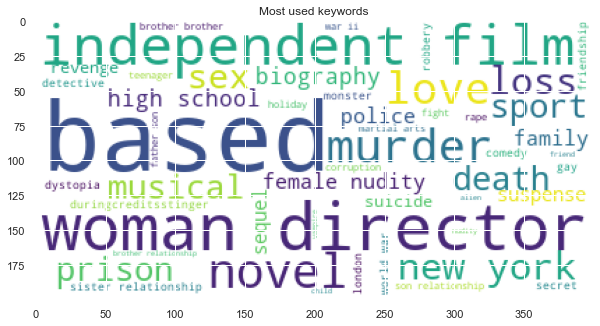

In [57]:
text = ','.join(df['keywords'].str.cat(sep='|').split('|'))
wc = WordCloud(max_words=50, background_color='white').generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.title("Most used keywords")
plt.show()

> Well, by the looks of it we can tell that "Based, Independent, and director" were the most common words among the given keywords.

--------

### Q: What're the most profitable movies in our Dataset?

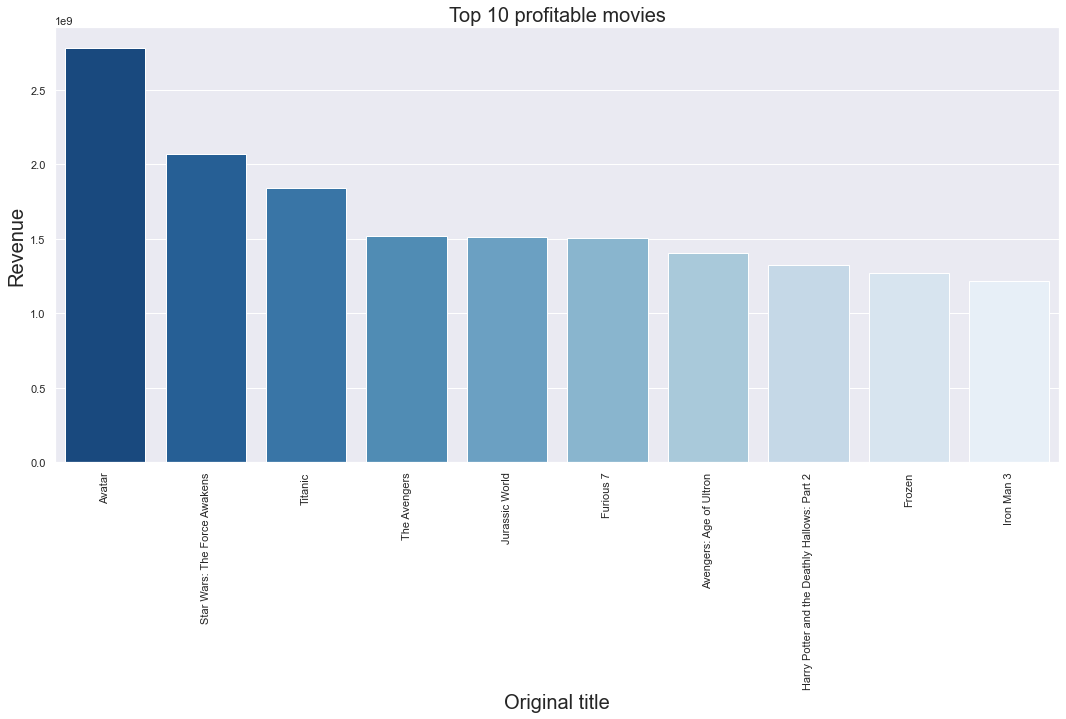

In [64]:
plt.figure(figsize=(18,8))
X = df[['original_title', 'revenue']].sort_values('revenue', ascending=False).head(10)
sns.barplot(x='original_title', y= 'revenue', data=X, palette='Blues_r')
plt.title('Top 10 profitable movies', fontsize = 20)
plt.xlabel('Original title', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

> James Cameron's "Avatar", along other movies conclude the list of the top 10 most profitable movies of all time

--------

### Q: How many movies were produced every year?

C:\Users\pc gamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


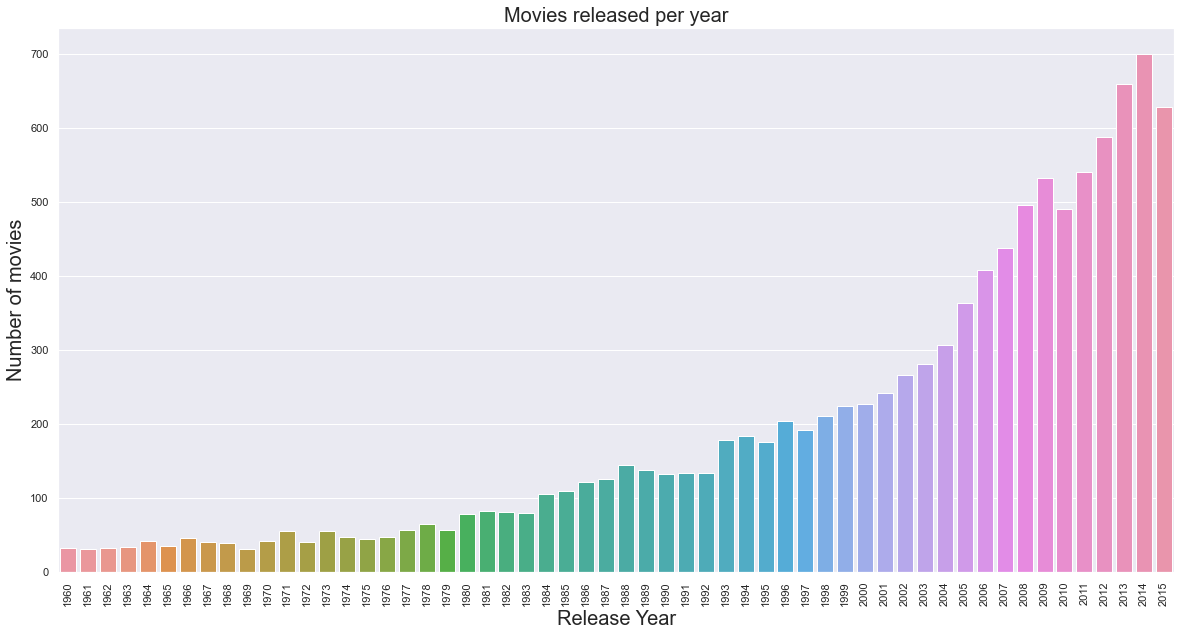

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(df['release_year'])
plt.title('Movies released per year', fontsize = 20)
plt.xlabel('Release Year', fontsize = 20)
plt.ylabel('Number of movies', fontsize = 20)
plt.xticks(rotation=90)
x.set_xlim(1960)
plt.show();

> 2014 in the lead with more than 700 movies, and as we can see the number of released movies is getting significantly higher every year

--------

<a id='conclusions'></a>
# Conclusions

At the beggining of the project we stated 4 questions, but in order to get to the answeres we had to go through the dataset wrandling cleaning, and analyzing. And since we're done with all of that, let's see how we answered them:

--------

#### What's the average movies runtime throughout the decades?
The most popular movies' runtime has always been around 90 minutes and the average is up to 120 minutes.

#### Who's the most successful director ever?
Considering only this dataset, It was 'Woody Allen' but that's debateable.


#### What're the most profitable movies in our Dataset?
That was -by far- James Cameron's (2009) Avatar.


#### What're the most used keywords in movies?

There were various common used words, but "Based, Independent, Director" stood out

#### How many movies were produced every year?
This question made us realize that we've been making more and more movies every year throughout the last decade, with the highest number of movies in 2015 with 700 movies.

--------

## Limitations
> Due to some missing values in the dataset and also not including all the information about all the movies ever made, this analysis only applies on the information from (TMDB.com). an in case we got more information we'll have better insights about the movies industry.